# Parsl Evaluation : Visualization and Graph Creation

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df_fibo = pd.read_csv("../bench_outputs/benchmark_fibo_8.csv", names=["type", "n", "time", "result"], index_col=None)
df_sq = pd.read_csv("../bench_outputs/benchmark_sq_8.csv", names=["type", "n", "tile_size", "sleep_dur", "time"], index_col=False)

In [29]:
types = df_fibo["type"].unique()

In [30]:
dfs = {}
for t in types:
    dfs[t] =  df_fibo[df_fibo["type"] == t]

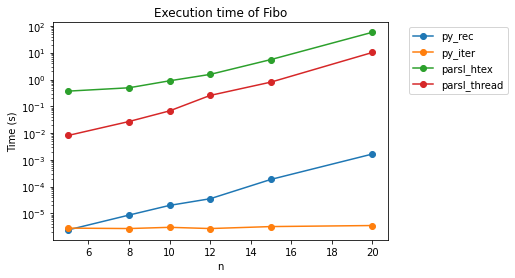

In [31]:
for t in types:
    plt.plot(dfs[t]["n"], dfs[t]["time"], label=t, marker='o' )
plt.title("Execution time of Fibo")

plt.xlabel('n')
plt.ylabel('Time (s)')
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [32]:
df_sq = df_sq.fillna(value=0)

In [33]:
sleep_dur = df_sq["sleep_dur"].unique()
tile_sizes = df_sq["tile_size"].unique()
types = df_sq["type"].unique()

dfs_per_dur = {}
for d in sleep_dur:
    dfs_per_dur[d] = df_sq[df_sq["sleep_dur"] == d]
    df_1 = dfs_per_dur[d]
    dfs_per_tile = {}
    for ts in tile_sizes:
      dfs_per_tile[ts] = df_1[df_1["tile_size"] == ts]
      df_2 = dfs_per_tile[ts]
      dfs_per_type = {}
      for t in types:
          dfs_per_type[t] = df_2[df_2["type"] == t]
      dfs_per_tile[ts] = dfs_per_type
    dfs_per_dur[d] = dfs_per_tile

In [34]:
def plot_per_s(s):
    fig, axs = plt.subplots(2, 2)
    fig.suptitle(f"Execution time using tasks ~ {s + 1e-8:e}")

    for i in [0, 1]:
        for j in [0, 1]:
            ts = tile_sizes[i*2 + j]
            df = dfs_per_dur[s][ts]
            for t in types:
                axs[i , j].plot(df[t]["n"], df[t]["time"], label=t )
            axs[i, j].set_title(f"Tile size {ts}")

    for ax in axs.flat:
        ax.set_yscale('log')
        ax.set(xlabel='Array Size', ylabel='Time (s)')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()


    plt.yscale("log")
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

def plot_per_s_ts(s, ts):
    df = dfs_per_dur[s][ts]
    for t in types:
        plt.plot(df[t]["n"], df[t]["time"], label=t)
    plt.title(f"Execution time using Tile size {ts} and tasks ~ {s + 1e-8:e}")

    plt.xlabel('Array Size')
    plt.ylabel('Time (s)')


    plt.yscale("log")
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

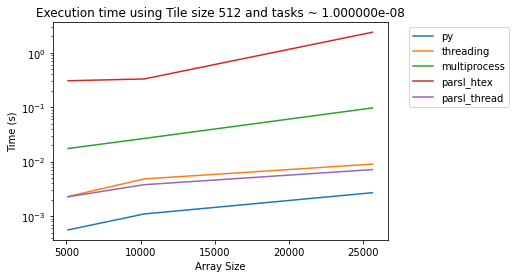

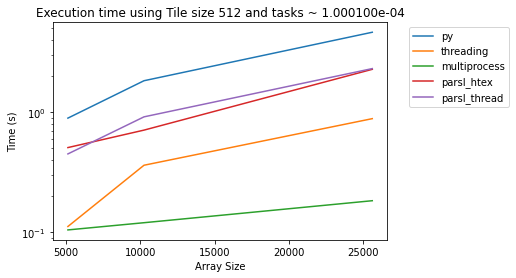

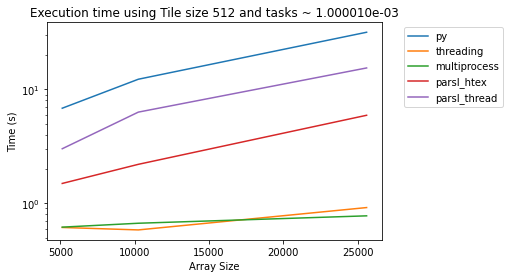

In [35]:
plot_per_s_ts(0, 512)
plot_per_s_ts(0.0001, 512)
plot_per_s_ts(0.001, 512)

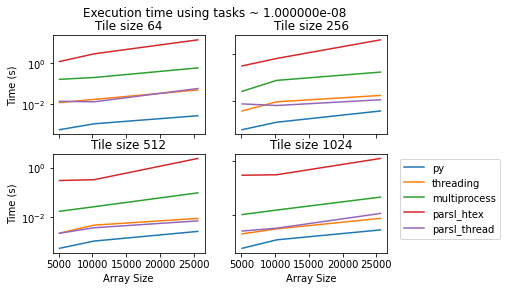

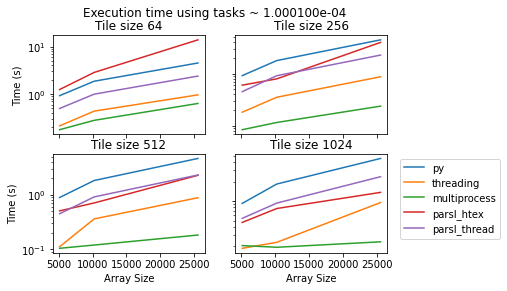

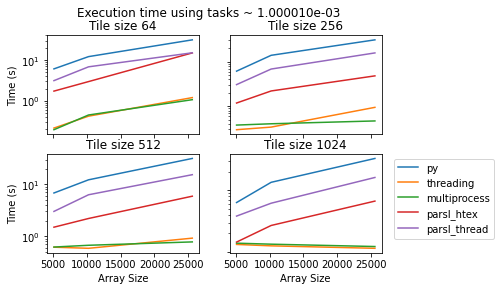

In [36]:
plot_per_s(0)
plot_per_s(0.0001)
plot_per_s(0.001)